## understand the problem..

* The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.

* price range in continuous data (target variable).
    * 0 = 500 to 5000 (low price)
    * 1 = 5000 to 20000 (medium price)
    * 2 = 20000 to 50000 ( high price)
    * 3 = 50000 above (very high price)
       * id:ID
       * battery_power:Total energy a battery can store in one time measured in mAh
       * blue:Has bluetooth or not
       * clock_speed:speed at which microprocessor executes instructions
       * dual_sim:Has dual sim support or not
       * fc:Front Camera mega pixels
       * four_g:Has 4G or not
       * int_memory:Internal Memory in Gigabytes
       * m_dep:Mobile Depth in cm
       * mobile_wt:Weight of mobile phone
       * n_cores:Number of cores of processor 
       * pc:Primary Camera mega pixels
       * px_height:Pixel Resolution Height
       * px_width:Pixel Resolution Width
       * ram:Random Access Memory in Megabytes
       * sc_h:Screen Height of mobile in cm
       * sc_w:Screen Width of mobile in cm
       * talk_time:longest time that a single battery charge will last when you are
       * five_g:Has 5G or not
       * touch_screen:Has touch screen or not
       * wifi:Has wifi or not


In [ ]:
# load the important libraries..
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings # this library used to avoid the warnings..
warnings.filterwarnings("ignore")

In [ ]:
#load the data
da=pd.read_csv("datasets_11167_15520_train.csv")
df=pd.DataFrame(da)
df.head(pd.set_option("display.max_columns",None))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## data analysis..

In [ ]:
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [5]:
df.sample(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1887,1719,1,2.1,1,0,0,52,0.1,187,3,1,417,520,2610,10,1,11,1,1,1,2
1809,683,1,2.1,0,7,0,30,0.1,197,7,8,927,1135,2066,9,0,15,0,0,0,1
65,616,0,1.9,1,13,1,44,0.8,81,3,17,651,1618,3366,18,8,13,1,1,0,3
527,1780,1,0.5,0,6,0,27,0.1,190,4,11,1331,1463,2776,19,17,14,1,1,1,3


In [6]:
row,column=df.shape
print(row,"rows & ",column,"columns")

2000 rows &  21 columns


In [7]:
print("size :",df.size)

size : 42000


In [8]:
df.dtypes # all the column have numerical data..

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
# column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## data preprocessing..

In [10]:
df.count() # df.notna().sum() both are same..

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [11]:
df.isna().sum() # no null value present

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* only numeric column present so can't need in split the numerical and categorical data..

## Exploratory Data Analysis..

In [12]:
df.shape

(2000, 21)

## univariante analysis.

In [13]:
a=df.iloc[:,0:10]
b=df.iloc[:,10:22]
b.shape

(2000, 11)

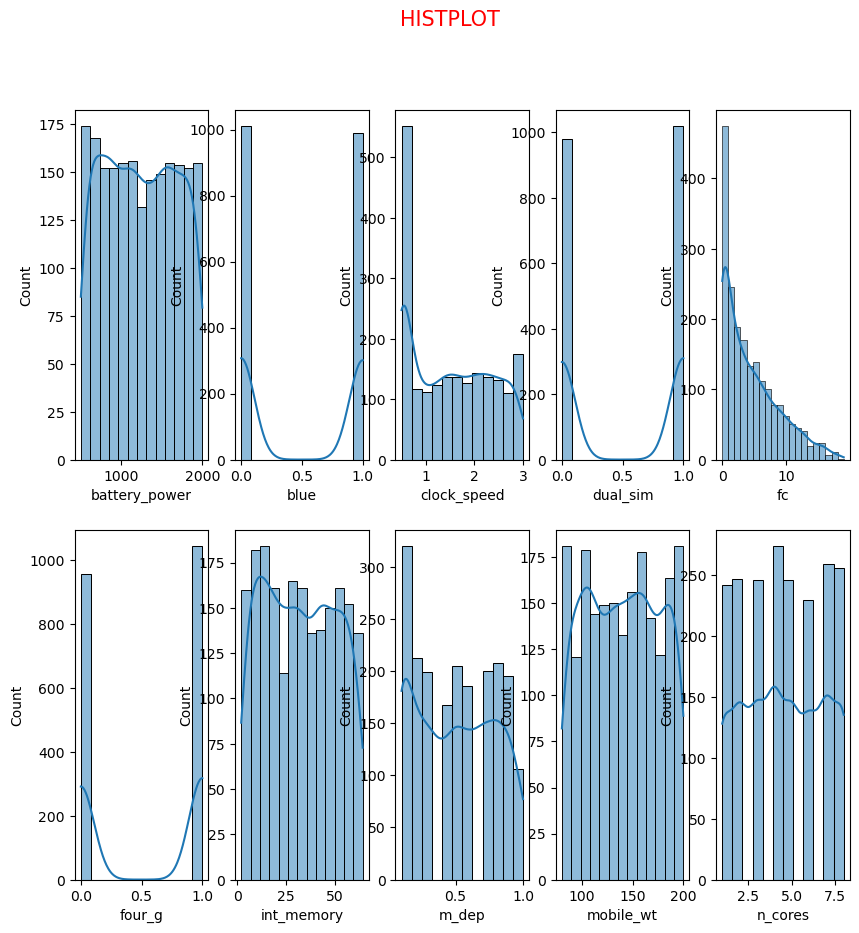

In [14]:
# hist  plot also used to check the data distributed in symmetrical or unsymmetrical data
plt.figure(figsize=(10,10))
no=1
for i in a:
    if no<=10:
        plt.suptitle("HISTPLOT",fontsize=15,color="red")
        plt.subplot(2,5,no)
        sns.histplot(x=a[i],kde=True)
        plt.xlabel(i)
    no+=1

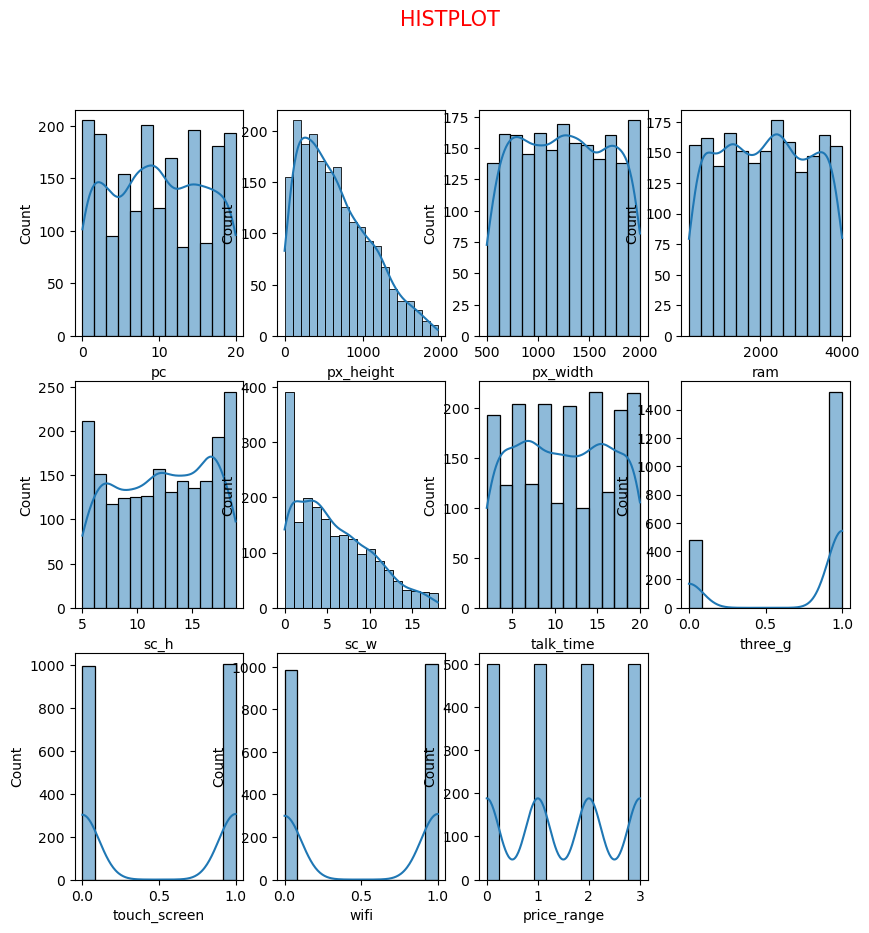

In [15]:
plt.figure(figsize=(10,10))
no=1
for i in b:
    if no<=12:
        plt.suptitle("HISTPLOT",fontsize=15,color="red")
        plt.subplot(3,4,no)
        sns.histplot(x=b[i],kde=True)
        plt.xlabel(i)
    no+=1

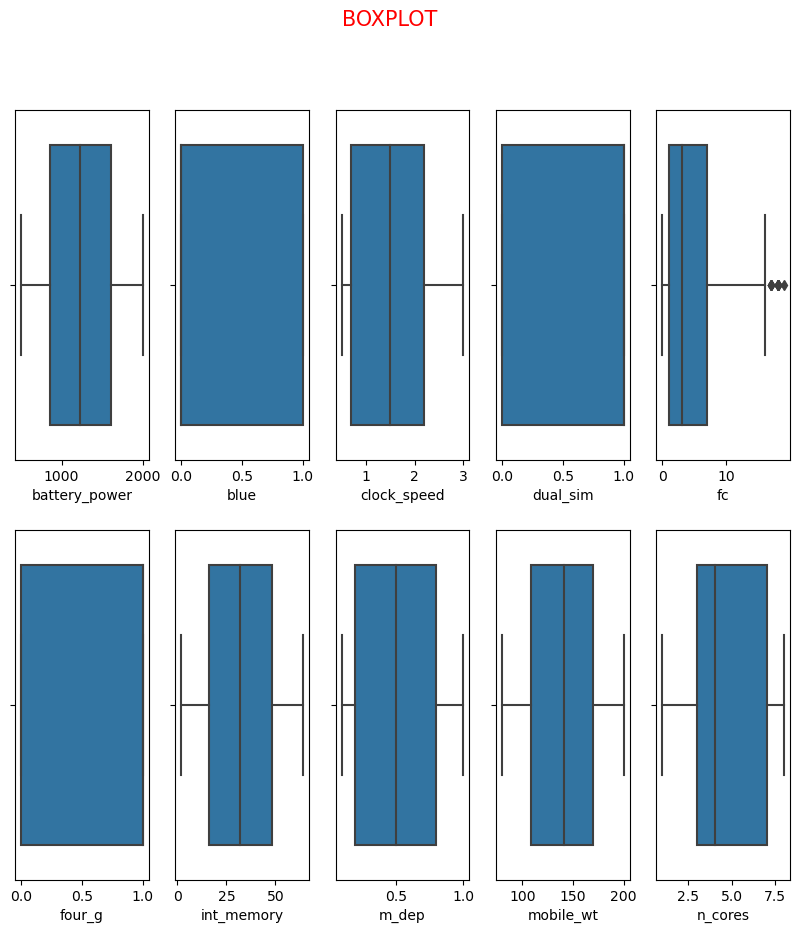

In [16]:
#boxplot also used to check the outlier.
plt.figure(figsize=(10,10))
no=1
for i in a:
    if no<=10:
        plt.suptitle("BOXPLOT",fontsize=15,color="red")
        plt.subplot(2,5,no)
        sns.boxplot(x=a[i])
        plt.xlabel(i)
    no+=1

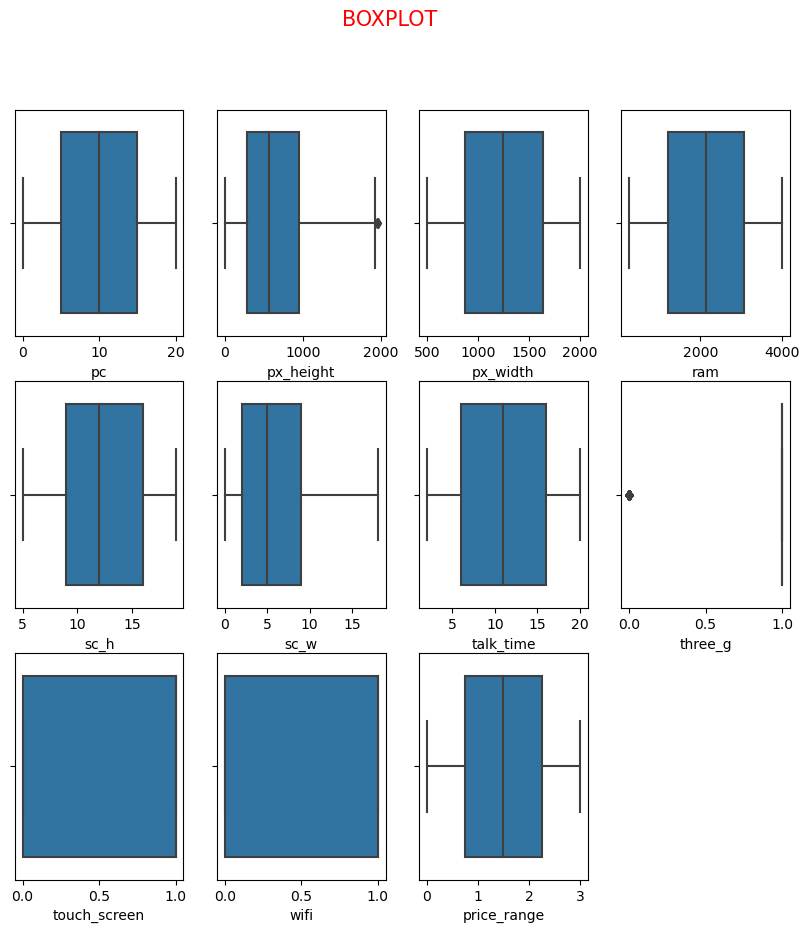

In [17]:
plt.figure(figsize=(10,10))
no=1
for i in b:
    if no<=12:
        plt.suptitle("BOXPLOT",fontsize=15,color="red")
        plt.subplot(3,4,no)
        sns.boxplot(x=b[i])
        plt.xlabel(i)
    no+=1

## bivariante analysis.

In [18]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

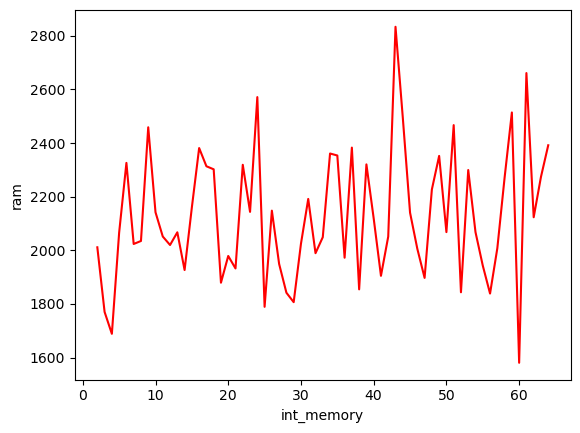

In [19]:
sns.lineplot(x="int_memory",y="ram",data=df,ci=None,color="red")
plt.show()

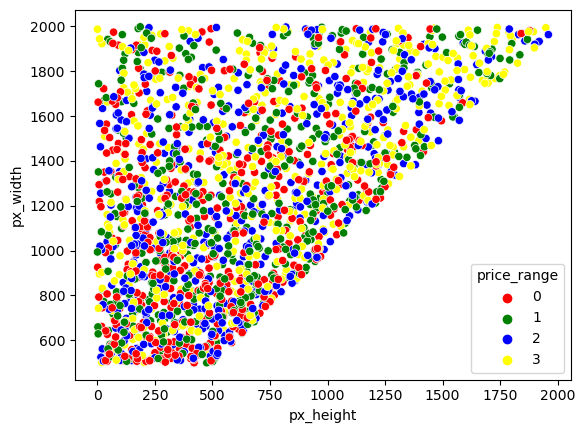

In [20]:
sns.scatterplot(x="px_height",y="px_width",data=df,ci=None,hue="price_range",palette=["red","green","blue","yellow"])
plt.show()

In [21]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [22]:
len(df.columns)

21

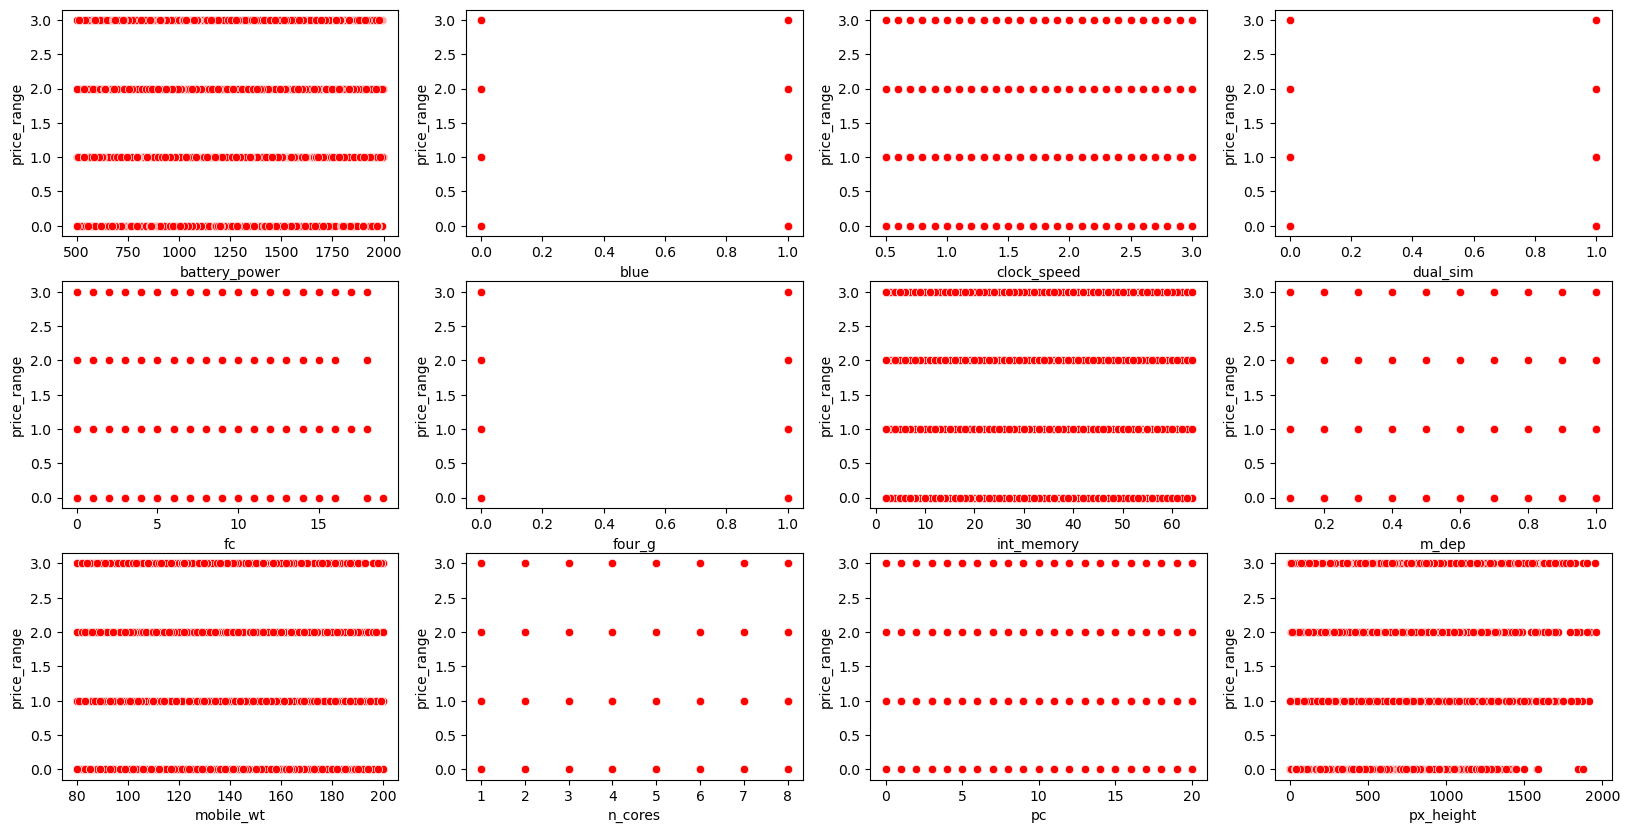

In [23]:
plt.figure(figsize=(20,10))
n=1
for i in df.columns:
    if n<=12:
        plt.subplot(3,4,n)
        sns.scatterplot(x=df[i],y="price_range",data=df,palette=["red","blue","green"],color="red")
        plt.xlabel(i)
    n+=1

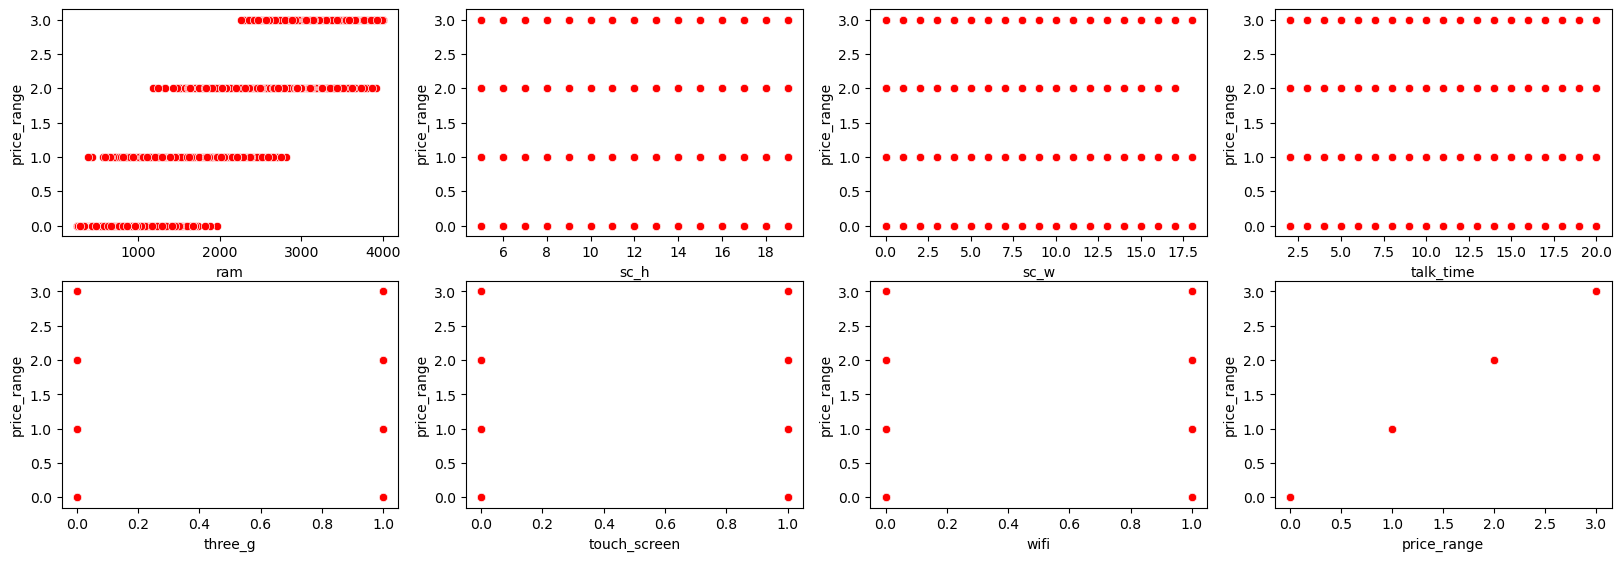

In [24]:
plt.figure(figsize=(20,10))
n=1
for i in df.columns[13:21]:
    if n<=12:
        plt.subplot(3,4,n)
        sns.scatterplot(x=df[i],y="price_range",data=df,palette=["red","blue","green"],color="red")
        plt.xlabel(i)
    n+=1

In [25]:
# heatmap- find the corelation between two variables..
c=df.corr()
c

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


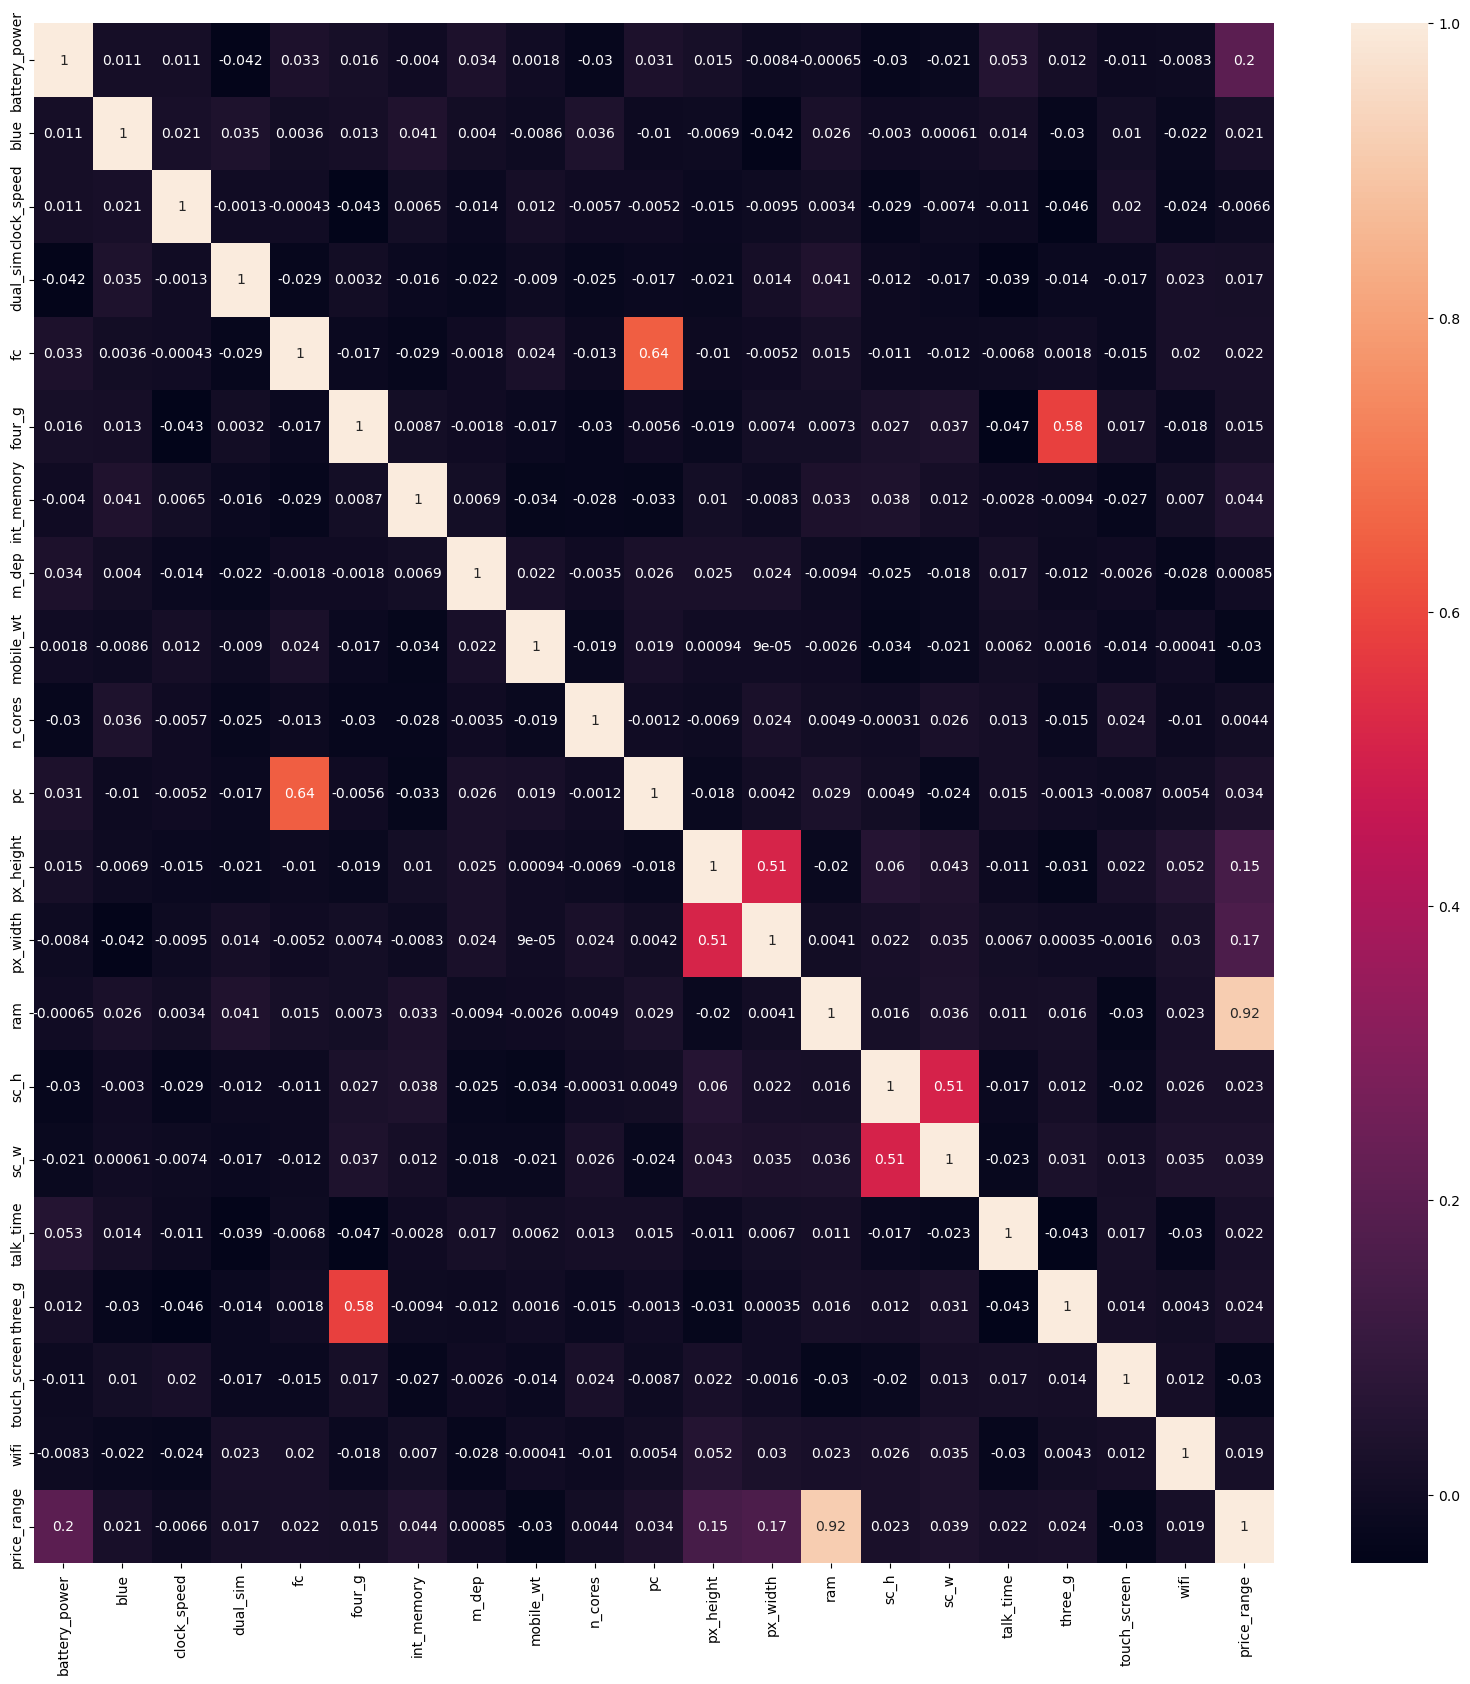

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(data=c,annot=True)
plt.show()

* this dataset is,
    * price range high core related in ram
    * price range less core related in mobile depth..


In [27]:
df.describe() # find the statistical analysis in given data..

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## create the model..

In [28]:
x=df.drop(["price_range"],axis=1) # independent variables..
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [29]:
y=df["price_range"] # target variables..
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)

## LinearRegression..

* linearregression is supervised learning algorithm used to one dependent continiuous variable and more then independent variable.

* linearregression is a linear relationship between two variables.

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
pre=model.predict(x_test)
train=model.score(x_train,y_train)
test=model.score(x_test,y_test)
mae=mean_absolute_error(y_test,pre)
mse=mean_squared_error(y_test,pre)
rmse=mean_squared_error(y_test,pre,squared=False)
print("train accuracy :",train)
print("test accuracy :",test)
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)

train accuracy : 0.9171722161040275
test accuracy : 0.9225197607787784
MAE : 0.267864972234501
MSE : 0.10147538505653884
RMSE : 0.3185520131101652


## KNN 

* KNN (k-nearest neighbors) is a simple and popular machine learning algorithm used for classification and regression tasks. In KNN, the output of a query instance is predicted by identifying the k nearest neighbors to that instance in the training data, and then taking a majority vote (for classification) or a weighted average (for regression) of the targets of those neighbors.



In [32]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model1=KNeighborsRegressor(n_neighbors=6,p=2)
model1.fit(x_train,y_train)
pre1=model1.predict(x_test)
train1=model1.score(x_train,y_train)
test1=model1.score(x_test,y_test)
mae1=mean_absolute_error(y_test,pre1)
mse1=mean_squared_error(y_test,pre1)
rmse1=mean_squared_error(y_test,pre1,squared=False)
print("train accuracy :",train1)
print("test accuracy :",test1)
print("MAE :",mae1)
print("MSE :",mse1)
print("RMSE :",rmse1)

train accuracy : 0.9647008699211241
test accuracy : 0.9648454711899888
MAE : 0.10875
MSE : 0.04604166666666667
RMSE : 0.21457321982639554


## SVM 

* Most closely near two suport vector form one hyperline to predict the data in distace based.

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model2=SVR()
model2.fit(x_train,y_train)
pre2=model2.predict(x_test)
train2=model1.score(x_train,y_train)
test2=model1.score(x_test,y_test)
mae2=mean_absolute_error(y_test,pre2)
mse2=mean_squared_error(y_test,pre2)
rmse2=mean_squared_error(y_test,pre2,squared=False)
print("train accuracy :",train2)
print("test accuracy :",test2)
print("MAE :",mae2)
print("MSE :",mse2)
print("RMSE :",rmse2)

train accuracy : 0.9647008699211241
test accuracy : 0.9648454711899888
MAE : 0.19739072783257783
MSE : 0.06211901448284678
RMSE : 0.24923686421323546


## DecisionTreeRegressor

* A decision tree is a type of supervised learning algorithm that is used for classification or regression tasks. It is a graphical representation of all the possible solutions to a decision based on certain conditions or inputs.

In [34]:
dt=DecisionTreeRegressor(max_depth=300,min_samples_split=50,max_features=15,
                         min_samples_leaf=40,random_state=40,ccp_alpha=0.002)
dt.fit(x_train,y_train)
pre3=dt.predict(x_test)
train3=dt.score(x_train,y_train)
test3=dt.score(x_test,y_test)
mae3=mean_absolute_error(y_test,pre3)
mse3=mean_squared_error(y_test,pre3)
rmse3=mean_squared_error(y_test,pre3,squared=False)
print("train accuracy :",train3)
print("test accuracy :",test3)
print("MAE :",mae3)
print("MSE :",mse3)
print("RMSE :",rmse3)

train accuracy : 0.905081706182682
test accuracy : 0.9053545557281604
MAE : 0.22994912474958545
MSE : 0.12395654682880167
RMSE : 0.35207463246988085


## RandomForestRegressor

* Random Forest is a machine learning algorithm that uses an ensemble of decision trees to perform classification or regression tasks. In a random forest, multiple decision trees are built on randomly selected subsets of the training data, and each tree's predictions are combined to make the final prediction.


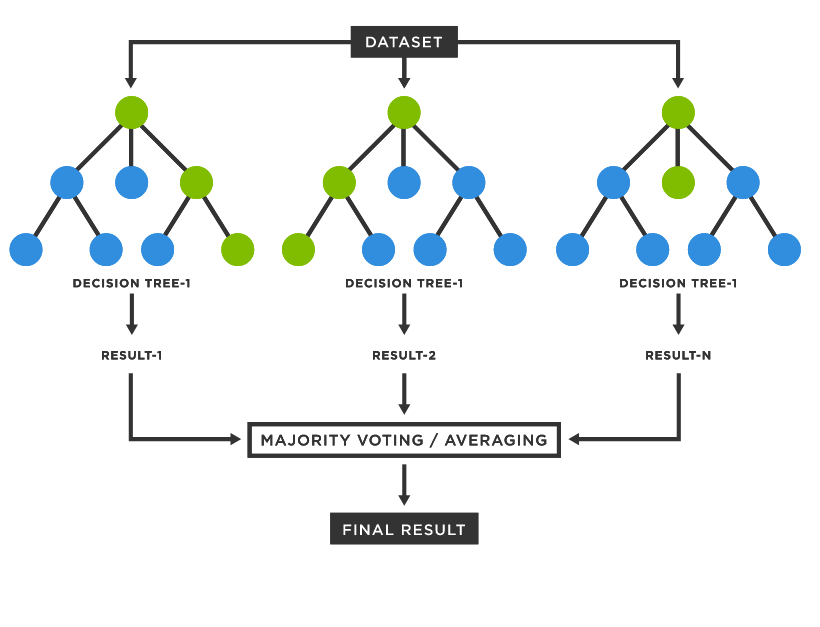

In [35]:
rf=RandomForestRegressor(n_estimators=10,max_depth=100,random_state=40,
                         min_samples_leaf=40,max_features=16,min_samples_split=40,max_samples=1500)
rf.fit(x_train,y_train)
pre4=rf.predict(x_test)
train4=rf.score(x_train,y_train)
test4=rf.score(x_test,y_test)
mae4=mean_absolute_error(y_test,pre4)
mse4=mean_squared_error(y_test,pre4)
rmse4=mean_squared_error(y_test,pre4,squared=False)
print("train accuracy :",train4)
print("test accuracy :",test4)
print("MAE :",mae4)
print("MSE :",mse4)
print("RMSE :",rmse4)

train accuracy : 0.9193393110196367
test accuracy : 0.9197579040839283
MAE : 0.24199351512413078
MSE : 0.10509257150817962
RMSE : 0.3241798443891594


## xgboost

* XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library designed to efficiently handle large-scale and high-dimensional data. It is an ensemble learning method that combines multiple weak prediction models (often decision trees) to form a more accurate and robust model

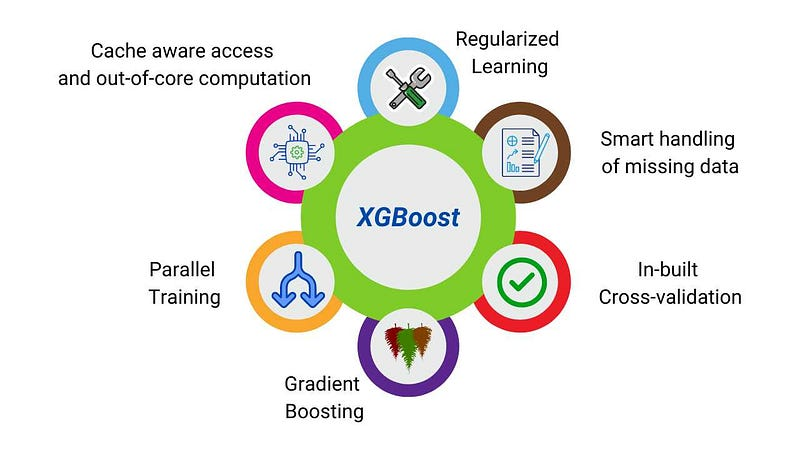

In [36]:
xg=XGBRegressor(gamma=0.01,random_state=2,subsample=0.3,colsample_bylevel=0.8,colsample_bytree=0.7,
                max_depth=3,n_estimators=90,min_child_weight=100,learning_rate=0.1,reg_alpha=4)
xg.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=None, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=100, missing=nan, monotone_constraints=None,
             n_estimators=90, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2, ...)

In [37]:
pre5=xg.predict(x_test)
train5=xg.score(x_train,y_train)
test5=xg.score(x_test,y_test)
mae5=mean_absolute_error(y_test,pre5)
mse5=mean_squared_error(y_test,pre5)
rmse5=mean_squared_error(y_test,pre5,squared=False)
print("train accuracy :",train5)
print("test accuracy :",test5)
print("MAE :",mae5)
print("MSE :",mse5)
print("RMSE :",rmse5)


train accuracy : 0.926255635205866
test accuracy : 0.9309424925603758
MAE : 0.25032210065226534
MSE : 0.09044418588425433
RMSE : 0.3007393986232172


## GradientBoostingRegressor..

In [38]:
gd=GradientBoostingRegressor(subsample=0.4,random_state=42,max_depth=1,min_samples_leaf=0.1,min_samples_split=0.1)
gd=gd.fit(x_train,y_train)
#gd.score(x_test,y_test)
pre6=gd.predict(x_test)
test6=r2_score(y_test,pre6)
train6=gd.score(x_train,y_train)
MAE6=mean_absolute_error(y_test,pre6)
MSE6=mean_squared_error(y_test,pre6)
RMSE6=mean_squared_error(y_test,pre6,squared=False)
print("mean absolute error :",MAE6)
print("mean squared error :",MSE6)
print("root mean squared error :",RMSE6)
print("test accuracy :",test6)
print("train accuracy :",train6)

mean absolute error : 0.2626325769999046
mean squared error : 0.10079396975987413
root mean squared error : 0.3174806604501668
test accuracy : 0.923040046759119
train accuracy : 0.9161439792646429


## AdaBoostRegressor

In [39]:
ad=AdaBoostRegressor(base_estimator=dt,random_state=4,n_estimators=50,learning_rate=0.1)
ad.fit(x_train,y_train)
p=ad.predict(x_test)
tra=ad.score(x_train,y_train)
tes=ad.score(x_test,y_test)
ma=mean_absolute_error(y_test,p)
ms=mean_squared_error(y_test,p)
rms=np.sqrt(ms)
print("train accuracy :",tra)
print("test accuracy :",tes)
print("MAE :",ma)
print("MSE :",ms)
print("RMSE :",rms)

train accuracy : 0.9589804213714006
test accuracy : 0.9530477963307565
MAE : 0.17519362338581382
MSE : 0.061493007694335286
RMSE : 0.24797783710310745


## BaggingRegressor

* bagging -the main goal of bagging reduce the overfitting and improve the accuracy and improve the stability of the model.
* bagging fully focus on the variance. 
* train accuracy > test acuracy (or) low bias and high variance.

In [40]:
from sklearn.ensemble import BaggingRegressor
ba=BaggingRegressor(base_estimator=dt,max_samples=1400,n_estimators=10,random_state=42)
ba.fit(x_train,y_train)
p=ba.predict(x_test)
ts=r2_score(y_test,p)
tr=ba.score(x_train,y_train)
te=ba.score(x_test,y_test)
#print("")
print("train :",tr)
print("test :",te)

train : 0.9184694164180357
test : 0.9188785847950773


In [41]:
ts

0.9188785847950773

 ## VotingRegressor
 
 * A voting classifier is an ensemble learning method in machine learning that combines multiple individual classifiers to make a prediction. It is a popular method used for both classification and regression tasks.
 
 * In a voting classifier, each individual classifier is trained on the same training dataset, and then the predictions of all the classifiers are combined to make the final prediction. There are two main types of voting classifiers.
 
 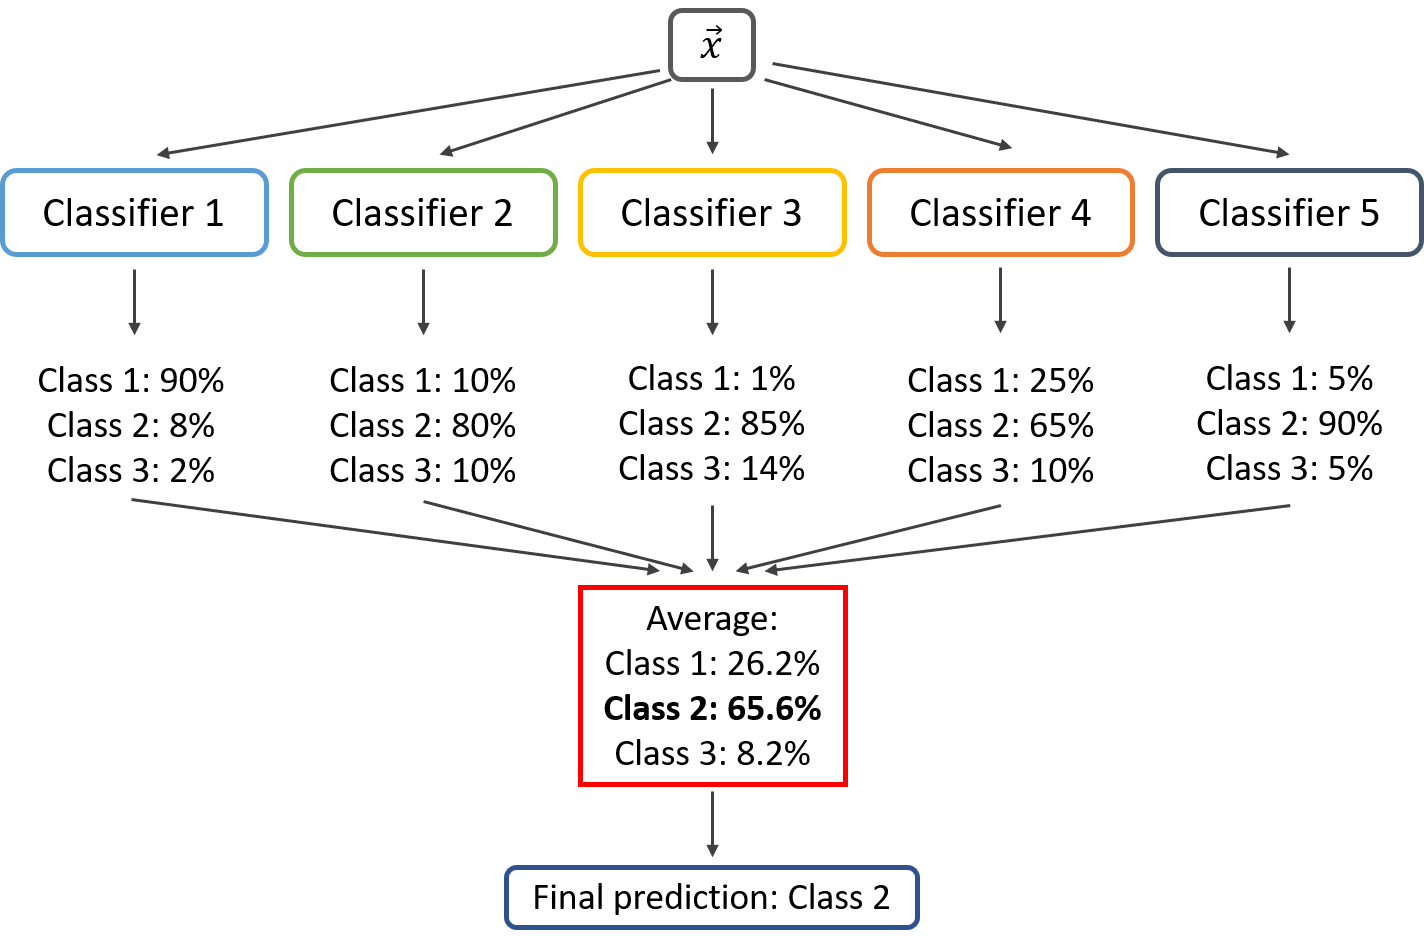

In [42]:
# combine the more the algorithm and take the average to given the accuracy.

voting_model = VotingRegressor(estimators=[('lr', xg), ('dt', ad),("svm",model2),("knn",model1)])
voting_model.fit(x_train, y_train) # train the voting model on your training data
y_pred = voting_model.predict(x_test)# make predictions using the voting model
train_accuracy=r2_score(y_test,y_pred)
y_pred_train = voting_model.predict(x_train)
test_accuracy =r2_score(y_train,y_pred_train)
print("train accuracy :",train_accuracy)
print("test accuracy :",test_accuracy)

train accuracy : 0.9591541416966315
test accuracy : 0.9573519437722124


## ANN

In [43]:
from sklearn.neural_network import MLPRegressor


In [201]:
ann = MLPRegressor(hidden_layer_sizes=(500,500,500),activation='relu',max_iter=10000,solver='adam') 

In [ ]:
ann.fit(x_train,y_train)

In [ ]:
A = ann.predict(x_train)

In [ ]:
from sklearn import metrics

In [ ]:
mae11 = metrics.mean_absolute_error(y_train,A)
mse11 = metrics.mean_squared_error(y_train,A)
rs11    = metrics.r2_score(y_train,A)

In [200]:
print('mae11:',mae11)
print('mse11:',mse11)
print('rs11:',rs11)

mae11: 0.4366980323556885
mse11: 0.3001409096518881
rs11: 0.7569671567187012


## deployement in flask

In [45]:
import  pickle as pic

In [46]:
pic.dump(model2,open("mobile.pkl","wb"))

In [47]:
read=pic.load(open("mobile.pkl","rb"))

## predict the result..

In [48]:
independent_input_data=[510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1]
e=read.predict([independent_input_data])[0]
print(e,"\n")
if e<=0.99:
    print("the mobile range is LOW PRICE.")
elif e<=1.99:
    print("the mobile range is MEDIUM PRICE.")
elif e<=2.99:
    print("the mobile range is HIGH PRICE.")
elif e<=3:
    print("the mobile range is VERY HIGH PRICE.")


2.675565395790427 

the mobile range is HIGH PRICE.


## result:

* linearregression method accuracy =91%
* knn and svr method accuracy =96%
* decisiontree & randomforest method accuracy  =91%
* adaboost & xgboost method accuracy =93%
* GradientBoostingRegressor method accuracy =92%


* above methods test and train accuracy is same.. (no overfitting or under fitting

* finally mobile price range prediction developement all machine learning algorithm compared to SVM and KNN also give better accuracy